In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
for dirname, _, filenames in os.walk('/Users/claretong/Desktop/Data/output'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/Users/claretong/Desktop/Data/output/Metadata.csv
/Users/claretong/Desktop/Data/output/Level1.csv
/Users/claretong/Desktop/Data/output/Level2.csv
/Users/claretong/Desktop/Data/output/Level3.csv
/Users/claretong/Desktop/Data/output/Level4.csv
/Users/claretong/Desktop/Data/output/Level5.csv


In [3]:
#import level 3 data 
data = pd.read_csv('/Users/claretong/Desktop/Data/output/Level3.csv', parse_dates = ['quarter'])

In [4]:
data.head()

,quarter,level_1,level_2,level_3,value
0,1995-01-01,Household Net Worth,Assets,Financial Assets,201725.4
1,1995-01-01,Household Net Worth,Assets,Residential Property Assets,287761.5
2,1995-01-01,Household Net Worth,Liabilities,Mortgage Loans,39775.9
3,1995-01-01,Household Net Worth,Liabilities,Personal Loans,23924.5
4,1995-04-01,Household Net Worth,Assets,Financial Assets,210041.0


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 404 entries, 0 to 403
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   quarter  404 non-null    datetime64[ns]
 1   level_1  404 non-null    object        
 2   level_2  404 non-null    object        
 3   level_3  404 non-null    object        
 4   value    404 non-null    float64       
dtypes: datetime64[ns](1), float64(1), object(3)
memory usage: 15.9+ KB


In [6]:
#group data by total household net worth every quarter
df1 = data.groupby(['quarter', 'level_1'], as_index = False)['value'].sum()
df1 = pd.DataFrame(df1)
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 101 entries, 0 to 100
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   quarter  101 non-null    datetime64[ns]
 1   level_1  101 non-null    object        
 2   value    101 non-null    float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 3.2+ KB


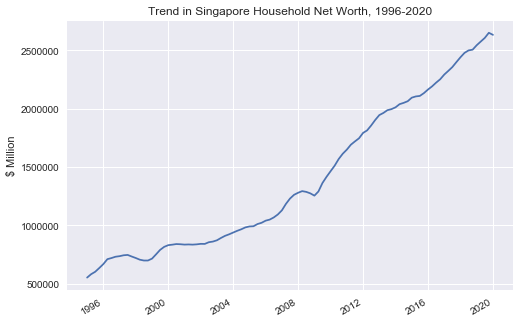

In [66]:
#set up plot and date formatting settings
from matplotlib.dates import DateFormatter

plt.style.use('seaborn')
fig, ax = plt.subplots()
ax.plot(df1.quarter, df1.value)

myFmt = DateFormatter("%Y")
ax.xaxis.set_major_formatter(myFmt)

#rotate date labels automatically
fig.autofmt_xdate()

#plot overall trend in household net worth from 1996 to 2020
plt.ylabel('$ Million')
plt.title('Trend in Singapore Household Net Worth, 1996-2020')
plt.show()

In [8]:
#group data by assets and liabilities 
df2 = data.groupby(['quarter', 'level_2'], as_index = False)['value'].sum()
df2 = pd.DataFrame(df2)

#pivot table for reporting purpose 
df2_pivot = df2.pivot(index = 'quarter' , columns = 'level_2' , values = 'value') 
df2_pivot.head()

level_2,Assets,Liabilities
quarter,,
1995-01-01,489486.9,63700.4
1995-04-01,515330.2,66888.1
1995-07-01,532292.3,70405.5
1995-10-01,560930.1,74097.4
1996-01-01,590934.8,77956.2


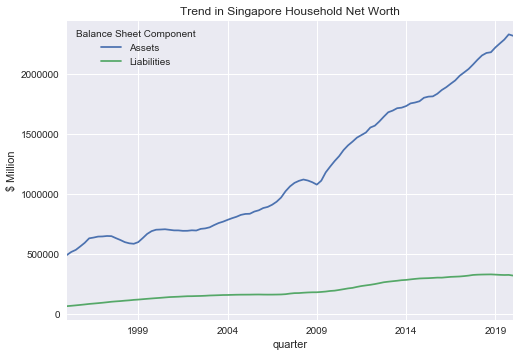

In [112]:
#plot trend in assets and liabilities 
df2_pivot[['Assets','Liabilities']].plot()
plt.ylabel('$ Million')
plt.legend(title = 'Balance Sheet Component')
plt.title('Trend in Singapore Household Net Worth')
plt.show()

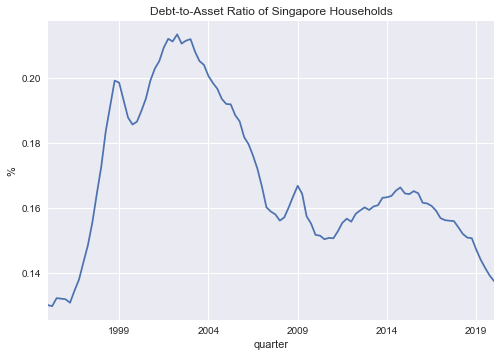

In [68]:
#plot debt-to-asset ratio of singapore households
df2_pivot['ratio'] = df2_pivot['Liabilities'].div(df2_pivot['Assets'], axis=0)*100
df2_pivot['ratio'].plot()
plt.ylabel('%')
plt.title('Debt-to-Asset Ratio of Singapore Households');

In [10]:
#group data by components of Assets and Liabilities 
df3 = data.groupby(['quarter', 'level_3'], as_index = False)['value'].sum()
df3 = pd.DataFrame(df3)

#pivot table for reporting purpose 
df3_pivot = df3.pivot(index = 'quarter' , columns = 'level_3' , values = 'value') 
df3_pivot.head()

level_3,Financial Assets,Mortgage Loans,Personal Loans,Residential Property Assets
quarter,,,,
1995-01-01,201725.4,39775.9,23924.5,287761.5
1995-04-01,210041.0,41932.1,24956.0,305289.2
1995-07-01,219333.9,44312.0,26093.5,312958.4
1995-10-01,228290.9,46760.2,27337.2,332639.2
1996-01-01,236111.1,49605.6,28350.6,354823.7


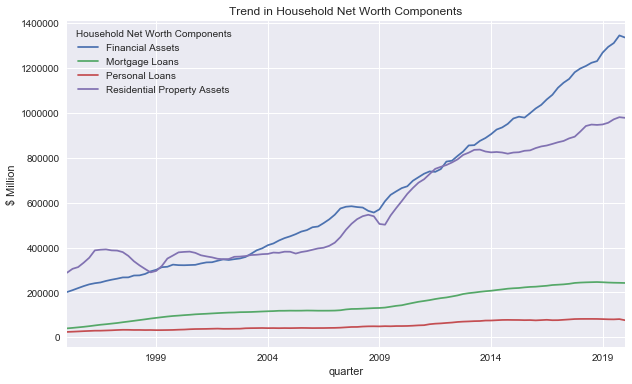

In [81]:
#plot trend in household net worth components 
df3_pivot.plot(figsize=(10, 6))
plt.ylabel('$ Million')
plt.legend(title = 'Household Net Worth Components');
plt.title('Trend in Household Net Worth Components')
plt.show()

In [12]:
#import more granular level 5 data that shows components of shares & securities
data1 = pd.read_csv('/Users/claretong/Desktop/Data/output/Level5.csv', parse_dates = ['quarter'])

In [113]:
data1.head()

,quarter,level_1,level_2,level_3,level_4,level_5,value
0,1995-01-01,Household Net Worth,Assets,Financial Assets,Shares & Securities,Listed Shares,25194.2
1,1995-01-01,Household Net Worth,Assets,Financial Assets,Shares & Securities,Unlisted Shares,15689.8
2,1995-01-01,Household Net Worth,Assets,Financial Assets,Shares & Securities,Unit Trusts & Investment Funds,1249.0
3,1995-04-01,Household Net Worth,Assets,Financial Assets,Shares & Securities,Listed Shares,25195.4
4,1995-04-01,Household Net Worth,Assets,Financial Assets,Shares & Securities,Unlisted Shares,19082.1


In [14]:
#uncover what are the types of shares & securities 
data1.level_5.unique()

array(['Listed Shares', 'Unlisted Shares',
       'Unit Trusts & Investment Funds'], dtype=object)

In [114]:
#pivot table for reporting purpose 
df4_pivot = data1.pivot(index = 'quarter' , columns = 'level_5' , values = 'value') 
df4_pivot.head()

level_5,Listed Shares,Unit Trusts & Investment Funds,Unlisted Shares
quarter,,,
1995-01-01,25194.2,1249.0,15689.8
1995-04-01,25195.4,1313.6,19082.1
1995-07-01,25518.0,1378.3,22447.1
1995-10-01,27281.4,1404.2,23896.8
1996-01-01,28735.5,1592.1,24659.3


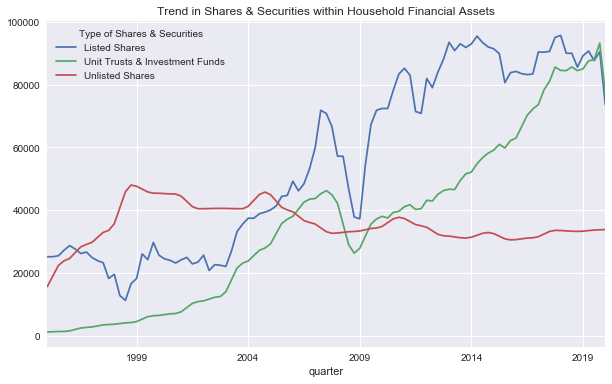

In [115]:
#plot trend in shares & securities components 
df4_pivot.plot(figsize=(10, 6))
plt.legend(title='Type of Shares & Securities')
plt.title('Trend in Shares & Securities within Household Financial Assets')
plt.show()

In [116]:
#import another data set that gives an added level of detail 
data2 = pd.read_csv('/Users/claretong/Desktop/Data/output/Level4.csv', parse_dates = ['quarter'])
data2.head()

,quarter,level_1,level_2,level_3,level_4,value
0,1995-01-01,Household Net Worth,Assets,Financial Assets,Currency & Deposits,80650.0
1,1995-01-01,Household Net Worth,Assets,Financial Assets,Shares & Securities,42133.0
2,1995-01-01,Household Net Worth,Assets,Financial Assets,Life Insurance,9252.4
3,1995-01-01,Household Net Worth,Assets,Financial Assets,Central Provident Fund (CPF),60080.0
4,1995-01-01,Household Net Worth,Assets,Financial Assets,Pension Funds,9610.0


In [119]:
#carve out year feature from the quarter column
import datetime as dt 
data2['year'] = data2.quarter.dt.year
data2.head()

,quarter,level_1,level_2,level_3,level_4,value,year
0,1995-01-01,Household Net Worth,Assets,Financial Assets,Currency & Deposits,80650.0,1995
1,1995-01-01,Household Net Worth,Assets,Financial Assets,Shares & Securities,42133.0,1995
2,1995-01-01,Household Net Worth,Assets,Financial Assets,Life Insurance,9252.4,1995
3,1995-01-01,Household Net Worth,Assets,Financial Assets,Central Provident Fund (CPF),60080.0,1995
4,1995-01-01,Household Net Worth,Assets,Financial Assets,Pension Funds,9610.0,1995


In [120]:
#select assets data, grouped by year and asset types 
assets = data2[data2.level_2 == 'Assets'].groupby(['year','level_4'], as_index = False)['value'].sum()
assets = pd.DataFrame(assets)

In [21]:
#pivot table for reporting purpose
assets_pivot = assets.pivot(index = 'year' , columns = 'level_4' , values = 'value') 
assets_pivot.tail()

level_4,Central Provident Fund (CPF),Currency & Deposits,Life Insurance,Pension Funds,Private Housing,Public Housing,Shares & Securities
year,,,,,,,
2016,1273483.5,1529722.7,601353.2,64151.0,1773334.2,1638871.0,730208.5
2017,1396291.2,1632755.9,671417.8,65478.8,1851521.5,1675107.7,815726.8
2018,1520171.6,1715259.4,728015.2,66699.2,2072904.4,1682120.5,833768.5
2019,1652830.1,1837663.0,818701.5,67186.5,2172841.6,1686151.2,846031.5
2020,435353.2,488073.9,211995.4,16828.4,554362.2,424221.2,184494.8


In [37]:
#calculate percentage share of each asset component 
assets_pivot['total']=assets_pivot.sum(axis=1)
apercents = assets_pivot.div(assets_pivot['total'], axis=0)
apercents = apercents.drop('total', axis=1)*100

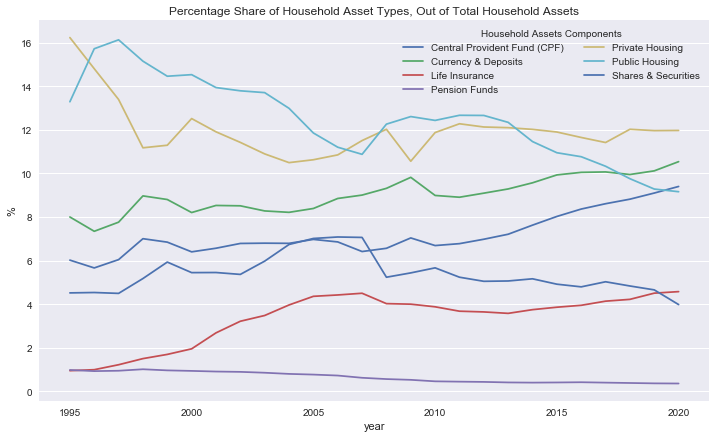

In [122]:
#plot percentage share of household assets 
apercents.plot(figsize=(12,7))
plt.ylabel('%')
plt.grid(axis='x')
plt.title('Percentage Share of Household Asset Types, Out of Total Household Assets')
plt.legend(title = 'Household Assets Components', ncol=2);

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  


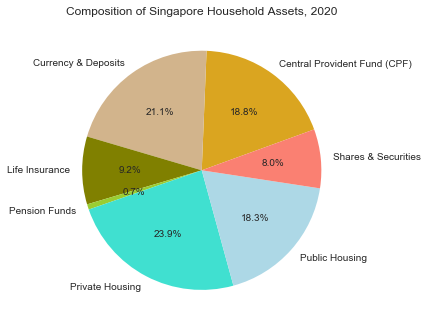

In [110]:
#trying out a pie chart for 2020 composition of singapore household assets 
pie1 = assets_pivot.drop('total', axis=1)[assets_pivot.index == 2020]

colors = ['goldenrod', 'tan', 'olive', 'yellowgreen', 'turquoise', 'lightblue', 'salmon']
plt.pie(pie1, labels = ['Central Provident Fund (CPF)', 'Currency & Deposits', 'Life Insurance',
       'Pension Funds', 'Private Housing', 'Public Housing',
       'Shares & Securities'], autopct='%1.1f%%', colors = colors, startangle=20)
plt.title('Composition of Singapore Household Assets, 2020');

In [41]:
#select liabilities data, grouped by year and liability types 
liab = data2[data2.level_2 == 'Liabilities'].groupby(['year','level_4'], as_index = False)['value'].sum()
liab = pd.DataFrame(liab)

In [42]:
#pivot table for reporting purpose
liab_pivot = liab.pivot(index = 'year' , columns = 'level_4' , values = 'value') 
liab_pivot.head()

level_4,Credit/Charge Cards,Financial Institutions,Housing & Development Board (HDB),Motor Vehicle,Others
year,,,,,
1995,4805.0,94603.7,78176.6,36834.1,60671.9
1996,5425.1,113839.3,102850.0,41471.6,70785.1
1997,6027.2,129308.7,132892.4,45704.3,78706.1
1998,6426.9,143285.8,170684.2,45097.7,78589.8
1999,7515.3,155371.7,208471.3,45091.7,76575.1


In [43]:
#calculate percentage share of each liability component 
liab_pivot['total'] = liab_pivot.sum(axis=1)
lpercent = liab_pivot.div(liab_pivot['total'], axis=0)
lpercent = lpercent.drop('total', axis=1)*100

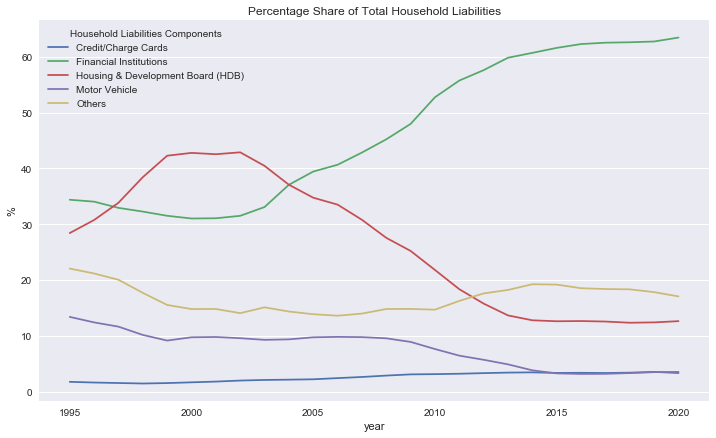

In [77]:
#plot percentage share of household liabilities
lpercent.plot(figsize=(12,7))
plt.ylabel('%')
plt.grid(axis='x')
plt.title('Percentage Share of Household Liabilities Types, Out of Total Household Liabilities')
plt.legend(title = 'Household Liabilities Components');

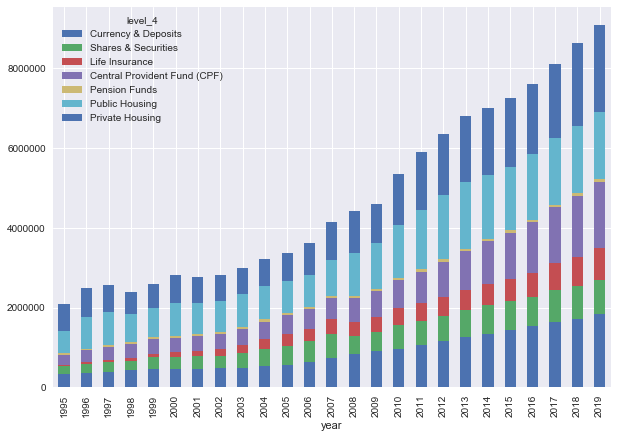

In [124]:
#plot a stacked bar chart for household assets
assets_pivot.loc[:'2019',['Currency & Deposits', 'Shares & Securities', 'Life Insurance', 'Central Provident Fund (CPF)', 
                    'Pension Funds', 'Public Housing','Private Housing']].plot.bar(stacked=True, figsize=(10,7));